In [75]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

#snps=pd.read_csv("/mnt/lab_data/kundaje/users/anusri/QTLs/bQTLs/src/pu1.txt",header=0,sep='\t')
dnase_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/DNASE/summary.mean.variant_scores_new.tsv"
atac_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/ATAC/summary.mean.variant_scores_new.tsv"
atac_preds_50m="/mnt/lab_data2/anusri/enformer/bqtls/chrombpne_preds/ATAC_50M/summary.mean.variant_scores_new_2.tsv"

#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_250M/bqtls_pu1_preds/snp_scores.tsv"


In [76]:
snps = pd.read_csv("/mnt/lab_data2/anusri/enformer/bqtls/source.tsv",header=0,sep='\t')

In [77]:
snps_selected
snps.head()
snps['rsid'] = snps["Chr"].astype(str) + "_" + snps["position"].astype(str) + "_" + snps["POSTallele"].astype(str) + "_" + snps["ALTallele"].astype(str)

In [81]:
bqtls_dnase = pd.read_csv(dnase_preds,sep="\t", header=0, index_col=False)
bqtls_atac = pd.read_csv(atac_preds,sep="\t", header=0, index_col=False)
bqtls_atac_50m = pd.read_csv(atac_preds_50m,sep="\t", header=0, index_col=False)
bqtls_atac_50m['rsid1'] = bqtls_atac_50m["chr"].astype(str) + "_" + bqtls_atac_50m["pos"].astype(str) + "_" + bqtls_atac_50m["allele2"].astype(str) + "_" + bqtls_atac_50m["allele1"].astype(str)

bqtls_dnase = bqtls_dnase.merge(snps, on=["rsid"])
bqtls_dnase['logratio']=np.log2((bqtls_dnase['prechipfreq'].astype(float)+.01)/(bqtls_dnase['POSTfreq'].astype(float)+0.01))
print(bqtls_dnase.shape)

bqtls_atac = bqtls_atac.merge(snps, on=["rsid"])
bqtls_atac['logratio']=np.log2((bqtls_atac['prechipfreq'].astype(float)+.01)/(bqtls_atac['POSTfreq'].astype(float)+0.01))
print(bqtls_atac.shape)

print(bqtls_atac_50m.head())
bqtls_atac_50m = bqtls_atac_50m.merge(snps, right_on=["rsid"], left_on=["rsid1"])
bqtls_atac_50m['logratio']=np.log2((bqtls_atac_50m['prechipfreq'].astype(float)+.01)/(bqtls_atac_50m['POSTfreq'].astype(float)+0.01))
print(bqtls_atac_50m.shape)

(32283, 31)
(32283, 31)
     chr        pos allele1 allele2  rsid  logfc.mean  abs_logfc.mean  \
0  chr14   36491929       A       G     0   -0.003573        0.005533   
1   chr1  212970898       C       T     0   -0.028217        0.028832   
2   chr1  247241664       G       A     0    0.005677        0.007244   
3  chr10  131934894       T       C     0   -0.007499        0.011212   
4  chr12  113859396       A       G     0    0.008961        0.012476   

   abs_logfc.mean.pval  jsd.mean  jsd.mean.pval  ...  \
0             0.836895  0.004586       0.844625  ...   
1             0.452418  0.009260       0.436804  ...   
2             0.797832  0.005027       0.810293  ...   
3             0.700605  0.009278       0.433587  ...   
4             0.680960  0.005033       0.804005  ...   

   max_percentile.mean.pval  logfc_x_max_percentile.mean  \
0                  0.310667                    -0.000256   
1                  0.748764                    -0.000256   
2                  0

In [82]:
data_enf = pd.read_csv("/mnt/lab_data2/anusri/enformer/bqtls/enformer_predictions.tsv", sep="\t", header=0)



In [83]:
data_enf

,chr,pos,ref,alt,rsid,DNASE_SAD,DNASE_SAR
0,chr14,20579247,G,T,rs56163433,-0.000005,-0.000006
1,chr14,20763006,A,C,rs1000608,-0.000121,-0.000154
2,chr14,20891188,C,G,rs1713454,-0.000005,-0.000005
3,chr14,20924449,T,A,rs3136818,0.000076,0.000084
4,chr14,20944397,C,T,rs111949975,0.000069,0.000078
...,...,...,...,...,...,...,...
32056,chr21,47711903,C,G,rs61202414,0.000026,0.000032
32057,chr21,47894705,G,A,rs7277132,-0.000008,-0.000010
32058,chr21,47920197,C,A,rs2839296,-0.000081,-0.000105
32059,chr21,47955095,T,C,rs146076255,0.000001,0.000002


In [84]:
data_enf['rsid'] = data_enf["chr"].astype(str) + "_" + data_enf["pos"].astype(str) + "_" + data_enf["ref"].astype(str) + "_" + data_enf["alt"].astype(str)
data_enf['rsid1'] = data_enf["chr"].astype(str) + "_" + data_enf["pos"].astype(str) + "_" + data_enf["alt"].astype(str) + "_" + data_enf["ref"].astype(str)



In [85]:
bqtls_atac1 = bqtls_atac.merge(data_enf, right_on=["rsid"], left_on=["rsid"], how="inner").drop_duplicates()
bqtls_atac2 = bqtls_atac.merge(data_enf, right_on=["rsid1"], left_on=["rsid"], how="inner").drop_duplicates()
bqtls_atac2["DNASE_SAD"] = -1*bqtls_atac2["DNASE_SAD"]
bqtls_atac2["DNASE_SAR"] = -1*bqtls_atac2["DNASE_SAR"]

bqtls_atac_full = pd.concat([bqtls_atac1, bqtls_atac2])

In [87]:
bqtls_atac1_50m = bqtls_atac_50m.merge(data_enf, right_on=["rsid"], left_on=["rsid1"], how="inner").drop_duplicates()
bqtls_atac2_50m = bqtls_atac_50m.merge(data_enf, right_on=["rsid1"], left_on=["rsid1"], how="inner").drop_duplicates()
bqtls_atac2_50m["DNASE_SAD"] = -1*bqtls_atac2_50m["DNASE_SAD"]
bqtls_atac2_50m["DNASE_SAR"] = -1*bqtls_atac2_50m["DNASE_SAR"]

bqtls_atac_full_50m = pd.concat([bqtls_atac1_50m, bqtls_atac2_50m])

In [88]:
bqtls_atac_full.shape

(31872, 40)

In [89]:
bqtls_atac_full_50m.shape

(31872, 43)

In [90]:
bqtls_atac.shape

(32283, 31)

In [91]:
bqtls_dn1 = bqtls_dnase.merge(data_enf, right_on=["rsid"], left_on=["rsid"], how="inner").drop_duplicates()
bqtls_dn2 = bqtls_dnase.merge(data_enf, right_on=["rsid1"], left_on=["rsid"], how="inner").drop_duplicates()
bqtls_dn2["DNASE_SAD"] = -1*bqtls_dn2["DNASE_SAD"]
bqtls_dn2["DNASE_SAR"] = -1*bqtls_dn2["DNASE_SAR"]

bqtls_dn_full = pd.concat([bqtls_dn1, bqtls_dn2])

In [92]:
bqtls_dn_full.shape

(31872, 40)

In [93]:
bqtls_dnase.shape

(32283, 31)

In [97]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


def  get_auprc_curves(data_atac, data_dnase, data_atac_50m):
    
    keyd="abs_logfc_x_jsd_x_max_percentile.mean"
    #print(sum(np.isnan( abs(merged_atac[keyd]))))
    #print(merged_dnase.shape)
    #print(merged_atac[np.isnan( abs(merged_atac[keyd]))])
   
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(data_atac["label"].astype(int), abs(data_atac[keyd]))
    roc_auc = metrics.average_precision_score(data_atac["label"], abs(data_atac[keyd]))
    plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPNet w/ ATAC, AP="+str(round(roc_auc,2)))
    #print(roc_auc)

    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(data_atac_50m["label"].astype(int), abs(data_atac_50m[keyd]))
    roc_auc = metrics.average_precision_score(data_atac_50m["label"], abs(data_atac_50m[keyd]))
    plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label="ChromBPNet w/ ATAC, AP="+str(round(roc_auc,2)))
    #print(roc_auc)

    
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(data_dnase["label"].astype(int), abs(data_dnase[keyd]))
    roc_auc = metrics.average_precision_score(data_dnase["label"], abs(data_dnase[keyd]))
    plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='cyan', label="ChromBPNet w/ DNase, AP="+str(round(roc_auc,2)))
    #print(roc_auc)
    
    #enformer
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(data_atac["label"].astype(int), abs(data_atac["DNASE_SAR"]))
    roc_auc = metrics.average_precision_score(data_atac["label"], abs(data_atac["DNASE_SAR"]))
    plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='orange', label="Enformer SAD, AP="+str(round(roc_auc,2)))
    #print(roc_auc)
    
    plt.legend()
    plt.show()
    #plt.savefig("subfigs_new/dsqtls_final.pdf", transparent=True, dpi=300)
    
#     plt.Figure()
#     plt.scatter(merged_enf["DNASE_SAD"][merged_enf["label"]==1], merged_enf["Beta"][merged_enf["label"]==1])
#     plt.show()
    
    keyd="jsd_sign.mean"

    data_atac["jsd_sign.mean"] = data_atac['jsd.mean']*np.sign(data_atac['logfc.mean'])
    data_atac_50m["jsd_sign.mean"] = data_atac_50m['jsd.mean']*np.sign(data_atac_50m['logfc.mean'])
    data_dnase["jsd_sign.mean"] = data_dnase['jsd.mean']*np.sign(data_dnase['logfc.mean'])

    print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(data_atac[keyd][data_atac["label"]==1], data_atac["logratio"][data_atac["label"]==1])[0],2))
    print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(data_atac_50m[keyd][data_atac_50m["label"]==1], data_atac_50m["logratio"][data_atac_50m["label"]==1])[0],2))
    print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(data_dnase[keyd][data_dnase["label"]==1], data_dnase["logratio"][data_dnase["label"]==1])[0],2))

#     import seaborn as sns

#     plt.figure(figsize=(8,5))
#     data = pd.DataFrame()
#     data["sd_sign.mean"] = merged_atac[merged_atac["label"]==1]["jsd_sign.mean"]
#     data["Beta"] = merged_atac[merged_atac["label"]==1]["Beta"]
#     data["logfc_x_max_percentile.mean"] = abs(merged_atac[merged_atac["label"]==1]["max_percentile.mean"])

#     sns.scatterplot(data=data, y="sd_sign.mean", x="Beta", hue="logfc_x_max_percentile.mean", s=10)
    #plt.show()
    #plt.savefig("subfigs_new/dsqtls_final.pdf", transparent=True, dpi=300)


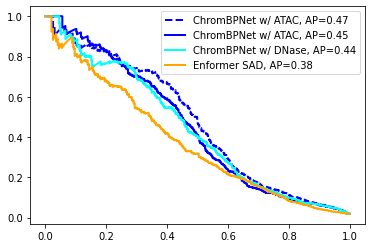

ChromBPNet ATAC:  0.6
ChromBPNet ATAC:  -0.58
ChromBPNet DNase:  0.6


In [98]:
get_auprc_curves(bqtls_atac_full, bqtls_dn_full, bqtls_atac_full_50m)

In [70]:
np.round(sum(bqtls_atac["label"])/bqtls_atac.shape[0],2)

0.04

In [63]:
bqtls_atac.shape

(32283, 32)

In [48]:
bqtls_atac_full.columns

Index(['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Chr', 'position', 'ALTallele',
       'POSTallele', 'label', 'POSTfreq', 'prechipfreq', 'logratio', 'chr_y',
       'pos_y', 'ref', 'alt', 'DNASE_SAD', 'DNASE_SAR', 'rsid1', 'rsid_x',
       'rsid_y', 'jsd_sign.mean'],
      dtype='object')